In [1]:
import pandas as pd
import numpy as np 
import math
from matplotlib import pyplot as plt
import sympy as sp
#Autor: PabloF - 14/01: calculamatrices fallos corregidos, añadido cálculo de esfuerzo de forma manual
# 15/01 ensamblaje arreglado
# 16/01 bug en ensamblaje con cierto tipo de problemas (enero 2018 pej) arreglado
# 18/01 esfuerzos en barras y cálculo simbólico
# 19/01 ensamblaje arreglado (lo había tocado el 16/01 y la lié cambiando una cosa q funcionaba). Arreglado ensamblaje.

Índice: 

- Funciónes 
- Cálculo de esfuerzos con cálculo numérico. Matrices de barras, sistema reducido, desplazamientos
- Plot de la estructura
- Esfuerzos
- Cálculo de esfuerzos locales y desplazamientos locales en barras 
- Esfuerzos globales (reacciones)
- Cálculo simbólico

Funciones:
- calculamatrices(EA,EI,L,cos,sen,tipo) -------------return M
- esfuerzos(EA, EI, L, cos, sen, tipo, desplaz)-----return(result, despl, M)
- localesaglobales(vect, cos, sen)---------------------return(glob)
- calculamatricesSIMB(EA,EI,L,cos,sen,tipo) ------return M
- globalesalocales(vect,cos,sen)-----------------------return(loc)

In [74]:
localesaglobales(np.array([-624.711521, 206.284930,-291.730946,0,0,0]),0.7071068,-0.7071068)

array([-295.8722878 ,  587.60324128, -291.730946  ,    0.        ,
          0.        ,    0.        ])

In [2]:
def calculamatrices(EA,EI,L,cos,sen,tipo):
        
    M = np.zeros(shape = (6,6))
    Ka = EA/L 
    Ki = 12*EI/(L*L*L)
    
    if tipo == 'AA':
        
        M[0][0] = cos*cos
        M[1][1] = sen*sen
        M[0][1] = cos*sen
        M[1][0] = cos*sen

        M[2][2] = 0
        M[2][1] = 0
        M[1][2] = 0
        M[2][0] = 0
        M[0][2] = 0
        M[2][3] = 0 
        M[3][2] = 0 
        M[4][2] = 0 
        M[2][4] = 0 
        M[2][5] = 0 
        M[5][2] = 0
        
        M[5][5] = 0 
        M[5][1] = 0
        M[1][5] = 0
        M[5][0] = 0
        M[0][5] = 0
        M[5][3] = 0 
        M[3][5] = 0 
        M[4][5] = 0 
        M[5][4] = 0 
        M[2][5] = 0 
        M[5][2] = 0
        
        M[3][3] = cos*cos
        M[4][4] = sen*sen
        M[3][4] = cos*sen
        M[4][3] = cos*sen
        
        M[0][3] = -cos*cos
        M[0][4] = -cos*sen
        M[1][4] = -sen*sen
        M[1][3] = -cos*sen
        M[3][0] = -cos*cos
        M[3][1] = -cos*sen
        M[4][0] = -cos*sen
        M[4][1] = -sen*sen
        
        
        
        M = EA/L*M
        
    if tipo == 'AR':
        
        M[0][0] = Ka*cos*cos + 0.25*Ki*sen*sen
        M[1][1] = Ka*sen*sen + 0.25*Ki*cos*cos
        M[0][1] = (Ka-0.25*Ki)*cos*sen
        M[1][0] = (Ka-0.25*Ki)*cos*sen

        M[2][2] = 0
        M[2][1] = 0
        M[1][2] = 0
        M[2][0] = 0
        M[0][2] = 0
        M[2][3] = 0 
        M[3][2] = 0 
        M[4][2] = 0 
        M[2][4] = 0 
        M[2][5] = 0 
        M[5][2] = 0
        
        M[5][5] = 0.25*L*L*Ki
        M[5][1] = 0.25*L*Ki*cos
        M[1][5] = 0.25*L*Ki*cos
        M[5][0] = -0.25*L*Ki*sen
        M[0][5] = -0.25*L*Ki*sen
        M[5][3] = 0.25*L*Ki*sen
        M[3][5] = 0.25*L*Ki*sen
        M[4][5] = -0.25*L*Ki*cos
        M[5][4] = -0.25*L*Ki*cos
        M[2][5] = 0 
        M[5][2] = 0
        
        M[3][3] = Ka*cos*cos + 0.25*Ki*sen*sen
        M[4][4] = Ka*sen*sen + 0.25*Ki*cos*cos
        M[3][4] = (Ka-0.25*Ki)*cos*sen
        M[4][3] = (Ka-0.25*Ki)*cos*sen
        
        M[0][3] = -Ka*cos*cos-0.25*Ki*sen*sen
        M[0][4] = -(Ka-0.25*Ki)*cos*sen
        M[1][4] = -Ka*sen*sen-0.25*Ki*cos*cos
        M[1][3] = -(Ka-0.25*Ki)*cos*sen
        M[3][0] = -Ka*cos*cos-0.25*Ki*sen*sen
        M[3][1] = -(Ka-0.25*Ki)*cos*sen
        M[4][0] = -(Ka-0.25*Ki)*cos*sen
        M[4][1] = -Ka*sen*sen-0.25*Ki*cos*cos
        
    if tipo == 'RA':

        M[0][0]=Ka*(cos*cos)+(0.25*Ki*(sen*sen))
        M[0][1]=(Ka-(0.25*Ki))*cos*sen
        M[0][2]=-L*0.25*Ki*sen
        M[0][3]=(-Ka*cos*cos)-(0.25*Ki*sen*sen)
        M[0][4]=-(Ka-(0.25*Ki))*cos*sen
        M[0][5]=0

        M[1][0]=(Ka-(0.25*Ki))*cos*sen
        M[1][1]=Ka*sen*sen+0.25*Ki*cos*cos
        M[1][2]=0.25*Ki*cos*L
        M[1][3]=-(Ka-0.25*Ki)*cos*sen
        M[1][4]=(-Ka*sen*sen)-(0.25*Ki*cos*cos)
        M[1][5]=0

        M[2][0]=-L*0.25*Ki*sen
        M[2][1]=0.25*Ki*cos*L
        M[2][2]=L*L*0.25*Ki
        M[2][3]=L*0.25*Ki*sen
        M[2][4]=-L*0.25*Ki*cos
        M[2][5]=0

        M[3][0]=(-Ka*cos*cos)-(0.25*Ki*sen*sen)
        M[3][1]=-(Ka-0.25*Ki)*cos*sen
        M[3][2]=L*0.25*Ki*sen
        M[3][3]=Ka*cos*cos+0.25*Ki*sen*sen
        M[3][4]=(Ka-0.25*Ki)*cos*sen
        M[3][5]=0

        M[4][0]=-(Ka-(0.25*Ki))*cos*sen
        M[4][1]=(-Ka*sen*sen)-(0.25*Ki*cos*cos)
        M[4][2]=-L*0.25*Ki*cos
        M[4][3]=(Ka-0.25*Ki)*cos*sen
        M[4][4]=Ka*sen*sen+0.25*Ki*cos*cos
        M[4][5]=0

        M[5][0]=0
        M[5][1]=0
        M[5][2]=0
        M[5][3]=0
        M[5][4]=0
        M[5][5]=0

    if tipo == 'RR':
        
        M[0][0] = Ka*cos*cos+Ki*sen*sen
        M[0][1] = (Ka-Ki)*cos*sen
        M[0][2] = -(L/2)*Ki*sen
        M[0][3] = -Ka*cos*cos-Ki*sen*sen
        M[0][4] = -(Ka-Ki)*cos*sen
        M[0][5] = -(L/2)*Ki*sen

        M[1][0] = (Ka-Ki)*cos*sen
        M[1][1] = Ka*sen*sen+Ki*cos*cos
        M[1][2] = (L/2)*Ki*cos
        M[1][3] = -(Ka-Ki)*cos*sen
        M[1][4] = -Ka*sen*sen-Ki*cos*cos
        M[1][5] = (L/2)*Ki*cos

        M[2][0] = -(L/2)*Ki*sen
        M[2][1] = (L/2)*Ki*cos
        M[2][2] = (L*L/3)*Ki
        M[2][3] = (L/2)*Ki*sen
        M[2][4] = -(L/2)*Ki*cos
        M[2][5] = (L*L/6)*Ki

        M[3][0] = -Ka*cos*cos-Ki*sen*sen
        M[3][1] = -(Ka-Ki)*cos*sen
        M[3][2] = (L/2)*Ki*sen
        M[3][3] = Ka*cos*cos+Ki*sen*sen
        M[3][4] = (Ka-Ki)*cos*sen
        M[3][5] = (L/2)*Ki*sen


        M[4][0] = -(Ka-Ki)*cos*sen
        M[4][1] = -Ka*sen*sen-Ki*cos*cos
        M[4][2] = -(L/2)*Ki*cos
        M[4][3] = (Ka-Ki)*cos*sen
        M[4][4] = Ka*sen*sen+Ki*cos*cos
        M[4][5]= -(L/2)*Ki*cos

        M[5][0] = -(L/2)*Ki*sen
        M[5][1] = (L/2)*Ki*cos
        M[5][2] = (L*L/6)*Ki
        M[5][3] = (L/2)*Ki*sen
        M[5][4]= -(L/2)*Ki*cos
        M[5][5] = (L*L/3)*Ki
    
    
    return M

In [3]:
def esfuerzos(EA, EI, L, cos, sen, tipo, desplaz):    
    
    R = np.zeros(shape = (6,6))
    
    R[0][0] = cos
    R[0][1] = sen
    R[0][2] = 0
    R[0][3] = 0
    R[0][4] = 0
    R[0][5] = 0
    
    R[1][0] = -sen
    R[1][1] = cos
    R[1][2] = 0
    R[1][3] = 0
    R[1][4] = 0
    R[1][5] = 0

    R[2][0] = 0
    R[2][1] = 0
    R[2][2] = 1
    R[2][3] = 0
    R[2][4] = 0
    R[2][5] = 0

    R[3][0] = 0
    R[3][1] = 0
    R[3][2] = 0
    R[3][3] = cos
    R[3][4] = sen
    R[3][5] = 0
    
    R[4][0] = 0
    R[4][1] = 0
    R[4][2] = 0
    R[4][3] = -sen
    R[4][4] = cos
    R[4][5] = 0
    
    R[5][0] = 0
    R[5][1] = 0
    R[5][2] = 0
    R[5][3] = 0
    R[5][4] = 0
    R[5][5] = 1

            
    M = calculamatrices(EA,EI,L,1,0,tipo)
    
    despl = np.dot(R,desplaz)
    
    result = np.dot(M,despl)
    
    return(result, despl, M)

In [4]:
def globalesalocales(vect,cos,sen):
    
    R = np.zeros(shape = (6,6))
    
    R[0][0] = cos
    R[0][1] = sen
    R[0][2] = 0
    R[0][3] = 0
    R[0][4] = 0
    R[0][5] = 0
    
    R[1][0] = -sen
    R[1][1] = cos
    R[1][2] = 0
    R[1][3] = 0
    R[1][4] = 0
    R[1][5] = 0

    R[2][0] = 0
    R[2][1] = 0
    R[2][2] = 1
    R[2][3] = 0
    R[2][4] = 0
    R[2][5] = 0

    R[3][0] = 0
    R[3][1] = 0
    R[3][2] = 0
    R[3][3] = cos
    R[3][4] = sen
    R[3][5] = 0
    
    R[4][0] = 0
    R[4][1] = 0
    R[4][2] = 0
    R[4][3] = -sen
    R[4][4] = cos
    R[4][5] = 0
    
    R[5][0] = 0
    R[5][1] = 0
    R[5][2] = 0
    R[5][3] = 0
    R[5][4] = 0
    R[5][5] = 1

    desploca = np.dot(R,vect)

    return(desploca)

In [5]:
def localesaglobales(vect, cos, sen):
    
    R = np.zeros(shape = (6,6))

    
    R[0][0] = cos
    R[0][1] = -sen
    R[0][2] = 0
    R[0][3] = 0
    R[0][4] = 0
    R[0][5] = 0
    
    R[1][0] = sen
    R[1][1] = cos
    R[1][2] = 0
    R[1][3] = 0
    R[1][4] = 0
    R[1][5] = 0

    R[2][0] = 0
    R[2][1] = 0
    R[2][2] = 1
    R[2][3] = 0
    R[2][4] = 0
    R[2][5] = 0

    R[3][0] = 0
    R[3][1] = 0
    R[3][2] = 0
    R[3][3] = cos
    R[3][4] = -sen
    R[3][5] = 0
    
    R[4][0] = 0
    R[4][1] = 0
    R[4][2] = 0
    R[4][3] = sen
    R[4][4] = cos
    R[4][5] = 0
    
    R[5][0] = 0
    R[5][1] = 0
    R[5][2] = 0
    R[5][3] = 0
    R[5][4] = 0
    R[5][5] = 1
    
    glob = np.dot(R,vect)
    
    return(glob)


           

In [6]:
def calculamatricesSIMB(EA,EI,L,cos,sen,tipo):
    
    H = sp.Symbol('H')
    a = sp.Symbol('a')
    I = sp.Symbol('I')
    E = sp.Symbol('E')
    L = L*H
    EA = I*a*E
    EI = EI*I*E
    
    M = np.zeros(shape = (6,6))
    
    M = pd.DataFrame(M)    
    Ka = EA/L 
    Ki = 12*EI/(L*L*L)
    
    if tipo == 'AA':
        
        M[0][0] = cos*cos
        M[1][1] = sen*sen
        M[0][1] = cos*sen
        M[1][0] = cos*sen

        M[2][2] = 0
        M[2][1] = 0
        M[1][2] = 0
        M[2][0] = 0
        M[0][2] = 0
        M[2][3] = 0 
        M[3][2] = 0 
        M[4][2] = 0 
        M[2][4] = 0 
        M[2][5] = 0 
        M[5][2] = 0
        
        M[5][5] = 0 
        M[5][1] = 0
        M[1][5] = 0
        M[5][0] = 0
        M[0][5] = 0
        M[5][3] = 0 
        M[3][5] = 0 
        M[4][5] = 0 
        M[5][4] = 0 
        M[2][5] = 0 
        M[5][2] = 0
        
        M[3][3] = cos*cos
        M[4][4] = sen*sen
        M[3][4] = cos*sen
        M[4][3] = cos*sen
        
        M[0][3] = -cos*cos
        M[0][4] = -cos*sen
        M[1][4] = -sen*sen
        M[1][3] = -cos*sen
        M[3][0] = -cos*cos
        M[3][1] = -cos*sen
        M[4][0] = -cos*sen
        M[4][1] = -sen*sen
        
        
        
        M = EA/L*M
        
    if tipo == 'AR':
        
        M[0][0] = Ka*cos*cos + 0.25*Ki*sen*sen
        M[1][1] = Ka*sen*sen + 0.25*Ki*cos*cos
        M[0][1] = (Ka-0.25*Ki)*cos*sen
        M[1][0] = (Ka-0.25*Ki)*cos*sen

        M[2][2] = 0
        M[2][1] = 0
        M[1][2] = 0
        M[2][0] = 0
        M[0][2] = 0
        M[2][3] = 0 
        M[3][2] = 0 
        M[4][2] = 0 
        M[2][4] = 0 
        M[2][5] = 0 
        M[5][2] = 0
        
        M[5][5] = 0.25*L*L*Ki
        M[5][1] = 0.25*L*Ki*cos
        M[1][5] = 0.25*L*Ki*cos
        M[5][0] = -0.25*L*Ki*sen
        M[0][5] = -0.25*L*Ki*sen
        M[5][3] = 0.25*L*Ki*sen
        M[3][5] = 0.25*L*Ki*sen
        M[4][5] = -0.25*L*Ki*cos
        M[5][4] = -0.25*L*Ki*cos
        M[2][5] = 0 
        M[5][2] = 0
        
        M[3][3] = Ka*cos*cos + 0.25*Ki*sen*sen
        M[4][4] = Ka*sen*sen + 0.25*Ki*cos*cos
        M[3][4] = (Ka-0.25*Ki)*cos*sen
        M[4][3] = (Ka-0.25*Ki)*cos*sen
        
        M[0][3] = -Ka*cos*cos-0.25*Ki*sen*sen
        M[0][4] = -(Ka-0.25*Ki)*cos*sen
        M[1][4] = -Ka*sen*sen-0.25*Ki*cos*cos
        M[1][3] = -(Ka-0.25*Ki)*cos*sen
        M[3][0] = -Ka*cos*cos-0.25*Ki*sen*sen
        M[3][1] = -(Ka-0.25*Ki)*cos*sen
        M[4][0] = -(Ka-0.25*Ki)*cos*sen
        M[4][1] = -Ka*sen*sen-0.25*Ki*cos*cos
        
    if tipo == 'RA':

        M[0][0]=Ka*(cos*cos)+(0.25*Ki*(sen*sen))
        M[0][1]=(Ka-(0.25*Ki))*cos*sen
        M[0][2]=-L*0.25*Ki*sen
        M[0][3]=(-Ka*cos*cos)-(0.25*Ki*sen*sen)
        M[0][4]=-(Ka-(0.25*Ki))*cos*sen
        M[0][5]=0

        M[1][0]=(Ka-(0.25*Ki))*cos*sen
        M[1][1]=Ka*sen*sen+0.25*Ki*cos*cos
        M[1][2]=0.25*Ki*cos*L
        M[1][3]=-(Ka-0.25*Ki)*cos*sen
        M[1][4]=(-Ka*sen*sen)-(0.25*Ki*cos*cos)
        M[1][5]=0

        M[2][0]=-L*0.25*Ki*sen
        M[2][1]=0.25*Ki*cos*L
        M[2][2]=L*L*0.25*Ki
        M[2][3]=L*0.25*Ki*sen
        M[2][4]=-L*0.25*Ki*cos
        M[2][5]=0

        M[3][0]=(-Ka*cos*cos)-(0.25*Ki*sen*sen)
        M[3][1]=-(Ka-0.25*Ki)*cos*sen
        M[3][2]=L*0.25*Ki*sen
        M[3][3]=Ka*cos*cos+0.25*Ki*sen*sen
        M[3][4]=(Ka-0.25*Ki)*cos*sen
        M[3][5]=0

        M[4][0]=-(Ka-(0.25*Ki))*cos*sen
        M[4][1]=(-Ka*sen*sen)-(0.25*Ki*cos*cos)
        M[4][2]=-L*0.25*Ki*cos
        M[4][3]=(Ka-0.25*Ki)*cos*sen
        M[4][4]=Ka*sen*sen+0.25*Ki*cos*cos
        M[4][5]=0

        M[5][0]=0
        M[5][1]=0
        M[5][2]=0
        M[5][3]=0
        M[5][4]=0
        M[5][5]=0

    if tipo == 'RR':
        
        M[0][0] = Ka*cos*cos+Ki*sen*sen
        M[0][1] = (Ka-Ki)*cos*sen
        M[0][2] = -(L/2)*Ki*sen
        M[0][3] = -Ka*cos*cos-Ki*sen*sen
        M[0][4] = -(Ka-Ki)*cos*sen
        M[0][5] = -(L/2)*Ki*sen

        M[1][0] = (Ka-Ki)*cos*sen
        M[1][1] = Ka*sen*sen+Ki*cos*cos
        M[1][2] = (L/2)*Ki*cos
        M[1][3] = -(Ka-Ki)*cos*sen
        M[1][4] = -Ka*sen*sen-Ki*cos*cos
        M[1][5] = (L/2)*Ki*cos

        M[2][0] = -(L/2)*Ki*sen
        M[2][1] = (L/2)*Ki*cos
        M[2][2] = (L*L/3)*Ki
        M[2][3] = (L/2)*Ki*sen
        M[2][4] = -(L/2)*Ki*cos
        M[2][5] = (L*L/6)*Ki

        M[3][0] = -Ka*cos*cos-Ki*sen*sen
        M[3][1] = -(Ka-Ki)*cos*sen
        M[3][2] = (L/2)*Ki*sen
        M[3][3] = Ka*cos*cos+Ki*sen*sen
        M[3][4] = (Ka-Ki)*cos*sen
        M[3][5] = (L/2)*Ki*sen


        M[4][0] = -(Ka-Ki)*cos*sen
        M[4][1] = -Ka*sen*sen-Ki*cos*cos
        M[4][2] = -(L/2)*Ki*cos
        M[4][3] = (Ka-Ki)*cos*sen
        M[4][4] = Ka*sen*sen+Ki*cos*cos
        M[4][5]= -(L/2)*Ki*cos

        M[5][0] = -(L/2)*Ki*sen
        M[5][1] = (L/2)*Ki*cos
        M[5][2] = (L*L/6)*Ki
        M[5][3] = (L/2)*Ki*sen
        M[5][4]= -(L/2)*Ki*cos
        M[5][5] = (L*L/3)*Ki
    
    M = M.to_numpy()
    
    return M

In [43]:
estructura = pd.read_excel('Estructura.xlsx', sheet_name='Estructuras')
estructura = estructura.sort_values('nodoi')
maxlen = np.array([estructura['nodoi'].max(),estructura['nodof'].max()]).max()

# No olvidar cambiar EA EI Fijarse en que todo está correcto!

Si hay simetría la fuerza va en ambos lados!  (ej: v3 = v5 pues F3 = F5)

In [108]:
estructura = pd.read_excel('Estructura.xlsx', sheet_name='Estructuras')
estructura = estructura.sort_values('nodoi')
maxlen = np.array([estructura['nodoi'].max(),estructura['nodof'].max()]).max()

A = np.zeros(shape=(3*(maxlen),3*(maxlen)))

printinfo = []

for row in estructura.iterrows():
    cualprimero = 0 
    inforow = row[1]
    iterator = inforow['nodoi']
    finnode = inforow['nodof']
    infobarra = inforow['barra']
    EA = inforow['EA']
    EI = inforow['EI']
    
    condini = 0
    condfin = 3
    esquinacol = 3
    esquinafila = 0
    
    M = calculamatrices(EA,EI,inforow['L'],inforow['cos'],inforow['sen'],inforow['tipo'])
        
    
    for i in range(0,3):
        for j in range(0,3):
            A[3*(iterator-1)+i][3*(iterator-1)+j] =  A[3*(iterator-1)+i][3*(iterator-1)+j]  + M[condini+i][condini+j]  # aquí el generador de elementos
            #print('\n \n','Barra ',inforow['barra'],' Tipo 1 ',' Nodo ', inforow['nodoi'], '-', inforow['nodof'], ' Término ',[condini+i,condini+j] , ' = ', M[condini+i][condini+j],' Ensamblado en elemento ',  [3*(iterator-1)+i,3*(iterator-1)+j] ,' sumado a ',  A[3*(iterator-1)+i][3*(iterator-1)+j] - M[condini+i][condini+j] ,' \n \n')

    for i in range(0,3):
        for j in range(0,3):
            A[3*(finnode-1)+i][3*(finnode-1)+j] =  A[3*(finnode-1)+i][3*(finnode-1)+j]  + M[condfin+i][condfin+j]  # aquí el generador de elementos
            #print('\n \n','Barra ',inforow['barra'],' Tipo 2 ',' Nodo ', inforow['nodoi'], '-', inforow['nodof'], ' Término ',[condfin+i, condfin+j] , ' = ', M[condfin+i][condfin+j],' Ensamblado en elemento ', [3*(finnode-1)+i,3*(finnode-1)+j],' sumado a ', A[3*(finnode-1)+i][3*(finnode-1)+j] - M[condfin+i][condfin+j],' \n \n')

    for i in range(0,3):
        for j in range(0,3):
            A[3*(iterator-1)+i][3*(finnode-1)+j] =  A[3*(iterator-1)+i][3*(finnode-1)+j] + M[i+esquinafila][j+esquinacol]  # aquí el generador de elementos
            #print('\n \n','Barra ',inforow['barra'],' Tipo 3 ',' Nodo ', inforow['nodoi'], '-', inforow['nodof'], ' Término ',[i+esquinafila,j+esquinacol] , ' = ', M[i+esquinafila][j+esquinacol],' Ensamblado en elemento ', [3*(iterator-1)+i,3*(finnode-1)+j] ,' sumado a ', A[3*(iterator-1)+i][3*(finnode-1)+j] - M[i+esquinafila][j+esquinacol],' \n \n')
            
    for i in range(0,3):
        for j in range(0,3):
            A[3*(finnode-1)+j][3*(iterator-1)+i] = A[3*(finnode-1)+j][3*(iterator-1)+i]  +  M[j+esquinacol][i+esquinafila] # aquí el generador de elementos
            #print('\n \n','Barra ',inforow['barra'],' Tipo 4 ',' Nodo ', inforow['nodoi'], '-', inforow['nodof'], ' Término ',[i+esquinafila,j+esquinacol] , ' = ', M[i+esquinafila][j+esquinacol],' Ensamblado en elemento ', [3*(iterator-1)+i,3*(finnode-1)+j] ,' sumado a ', A[3*(iterator-1)+i][3*(finnode-1)+j] - M[i+esquinafila][j+esquinacol],' \n \n')

    
    printinfo.append([infobarra,M,iterator,finnode])
    
printinfo = sorted(printinfo, key=lambda tup: tup[0])

for i in range(0,len(printinfo)):
    print('\n  \n Barra', printinfo[i][0], ' - Cuidado con el orden ! \n \n')#, '\n \n',printinfo[i][1], '\n \n')

    cols = ['U'+str(printinfo[i][2]),   'V'+str(printinfo[i][2]),   'A'+str(printinfo[i][2]),   'U'+str(printinfo[i][3]),   'V'+str(printinfo[i][3]),    'A'+str(printinfo[i][3])]
    df = pd.DataFrame(printinfo[i][1], columns=cols, index=cols)
    print(df)
    
print('\n \n \n Assembly: \n ')


pd.DataFrame(A).to_excel('FullMatrix.xlsx')

print('Full Matrix dropped to FullMatrix.xlsx \n')

despl = pd.read_excel('Estructura.xlsx', sheet_name='Desplazamientos')
despl = despl.to_numpy()
mxmin = np.where(despl == 1)

mn = mxmin[0].min()
mx = mxmin[0].max()

B = np.zeros(shape=(mx+1-mn,mx+1-mn))
ln = len(B)

for i in range(mn,mx+1):
    B = np.append(B,[A[i][mn:mx+1]],axis = 0)

B = np.delete(B,slice(0,ln),axis = 0)

Forces = pd.read_excel('Estructura.xlsx', sheet_name='Fuerzas')
Forces = Forces.to_numpy()
if(len(Forces) != len(despl)):
    print('/n Warning - Force shape != Despl shape - Check everything is OK /n')
    
Forces = Forces[mn:mx+1]

Eliminate = despl[mn:mx+1]
Eliminate = np.where(Eliminate == 0)

Forces = np.delete(Forces, Eliminate[0] , 0)

B = np.delete(B, Eliminate[0],0)
B = np.delete(B, Eliminate[0],1)

X = np.linalg.inv(B).dot(Forces)

Result = np.where(despl == 1)[0]

pd.DataFrame(B).to_excel('ReducedMatrix.xlsx')

print('Reduced matrix dropped to ReducedMatrix.xlsx \n')


vect = []

for i in range(0,len(Result)):
    indicat = math.floor(Result[i]/3) + 1
    
    
    if (math.floor(Result[i]/3))*3 == Result[i]:
        
        vect.append(['u',indicat])
        
    if (math.floor(Result[i]/3))*3 + 1 == Result[i]:
        
        vect.append(['v',indicat])


    if (math.floor(Result[i]/3))*3 + 2 == Result[i]:
        
        vect.append(['ang',indicat])


        
print('\n  System:\n ')

print(pd.DataFrame(B))

print('\n Multiplied by: \n')

print(pd.DataFrame(vect, columns = ['type','node']))

print('\n Equaled to: \n')

print(pd.DataFrame(Forces, columns=['Forces']))

print(' \n  \n As indicated in the despl vector, the despl and results are, in order: \n')


for i in range(0,len(vect)):
    print(vect[i][0],vect[i][1], '=', X[i])


  
 Barra 1  - Cuidado con el orden ! 
 

          U1        V1        A1        U3        V3   A3
U1  3.053309 -2.256420 -0.876579 -3.053309  2.256420  0.0
V1 -2.256420  3.053309 -0.876579  2.256420 -3.053309  0.0
A1 -0.876579 -0.876579  1.928473  0.876579  0.876579  0.0
U3 -3.053309  2.256420  0.876579  3.053309 -2.256420  0.0
V3  2.256420 -3.053309  0.876579 -2.256420  3.053309  0.0
A3  0.000000  0.000000  0.000000  0.000000  0.000000  0.0

  
 Barra 2  - Cuidado con el orden ! 
 

          U1        V1        A1        U2        V2        A2
U1  9.015778 -0.000000 -4.958678 -9.015778  0.000000 -4.958678
V1 -0.000000  7.509091  0.000000  0.000000 -7.509091  0.000000
A1 -4.958678  0.000000  3.636364  4.958678 -0.000000  1.818182
U2 -9.015778  0.000000  4.958678  9.015778 -0.000000  4.958678
V2  0.000000 -7.509091 -0.000000 -0.000000  7.509091 -0.000000
A2 -4.958678  0.000000  1.818182  4.958678 -0.000000  3.636364

  
 Barra 3  - Cuidado con el orden ! 
 

          U3        V3  

In [112]:
X = np.array([[-2.4354 ],
       [-1.8771],
       [ 4.6677 ],
       [-7.8865 ],
       [-4.6677],
       [-2.4354 ],
       [ 1.8771],
       [-4.6677],
       [-7.8865 ],
       [ 4.6677]])

Si pongo en función de EI, esto sale entre EI... Careful! Y en función de p pues por p. Y la matriz pues por EI. 

In [97]:
##X = np.array([[1],[0.0101034],[-0.24169674],[0.0101034],[-0.24169674]])

In [61]:
# X = np.array([[],[],[]]) # Se mete primero desplazamientos en excel con el impuesto 0 y se saca, luego se completa metiendo el que toque donde toque y volviendo a poner 1 

# PLOT

Ajusta la escala según el desplazamiento que ha salido arriba! Si es por ejemplo 0.0005 lo suyo para que se vea es un *100. 

In [65]:
scale = 0.0010


 Initial node found. Coordinates set

 node  2  coordinates set 


 node  4  coordinates set 


 node  6  coordinates set 


 node  3  coordinates set 


 node  5  coordinates set 


 node  7  coordinates set 


 node  8  coordinates set 

All displacements are * 0.001

 v 1 added 


 u 2 added 


 v 2 added 


 v 4 added 


 u 6 added 


 v 6 added 



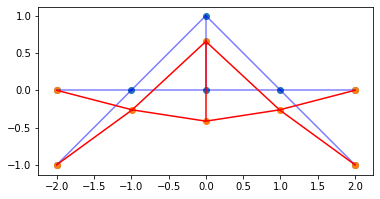

In [66]:
positions = []
posicionados = []
barra = []
count = 0
valuu = 0 
for i in range(0,len(estructura)):

    barr = estructura.iloc[i]['barra']
    nodoini = estructura.iloc[i]['nodoi']
    nodofin = estructura.iloc[i]['nodof']
    Long = estructura.iloc[i]['L']
    cose = estructura.iloc[i]['cos']
    seno = estructura.iloc[i]['sen']

    if (nodoini == 1 and count == 0):
        print('\n Initial node found. Coordinates set')
        count = count + 1 
        posicionados.append(nodoini)
        posicionados.append(nodofin)
        positions.append([0,0])
        positions.append([positions[0][0]+cose*Long, positions[0][1]+seno*Long])
        barra.append(barr)
        barra.append(barr)
        
        print('\n node ', nodofin, ' coordinates set \n')

        
    if nodoini in posicionados and nodofin not in posicionados:

        indixe = posicionados.index(nodoini)
        posicionados.append(nodofin)
        positions.append([positions[indixe][0] + cose*Long, positions[indixe][1] + seno*Long])
        
        print('\n node ',nodofin,' coordinates set \n')
        

        
    if nodofin in posicionados and nodoini not in posicionados:

        indixe = posicionados.index(nodofin)
        posicionados.append(nodoini)
        positions.append([positions[indixe][0] - cose*Long, positions[indixe][1] - seno*Long])
        
        print('\n node ',nodoini,' coordinates set \n')

    
print('All displacements are *',scale)

x = []
y = []
for i in positions: 
    x.append(i[0])
    y.append(i[1])

plt.scatter(x,y)

for i in range(0,len(estructura)):
    
    inic = estructura.iloc[i]['nodoi']
    fina = estructura.iloc[i]['nodof']
    
    indixini = posicionados.index(inic)
    indixfin = posicionados.index(fina)
    
    x_values = [x[indixini],x[indixfin]]
    y_values = [y[indixini],y[indixfin]]
    
    plt.plot(x_values,y_values, alpha = 0.5, color = 'b')
    
    
    
newpositions = positions 



for i in range(0,len(Result)):
    indicat = math.floor(Result[i]/3) + 1
    
    indicex = posicionados.index(indicat)

    if (math.floor(Result[i]/3))*3 == Result[i]:
        
        newpositions[indicex][0] = positions[indicex][0] + X[i]*scale
        print('\n u', indicat, 'added \n')

    if (math.floor(Result[i]/3))*3 + 1 == Result[i]:
        
        newpositions[indicex][1] = positions[indicex][1] + X[i]*scale
        print('\n v', indicat, 'added \n')


xn = []
yn = []
for i in newpositions: 
    xn.append(i[0])
    yn.append(i[1])

plt.scatter(xn,yn)

for i in range(0,len(estructura)):
    
    inic = estructura.iloc[i]['nodoi']
    fina = estructura.iloc[i]['nodof']
    
    indixini = posicionados.index(inic)
    indixfin = posicionados.index(fina)
    
    xn_values = [xn[indixini],xn[indixfin]]
    yn_values = [yn[indixini],yn[indixfin]]
    
    plt.plot(xn_values,yn_values, color = 'r')
    
    
plt.gca().set_aspect('equal', adjustable='box')


# Esfuerzos 

#  MANUAL

In [10]:

EA = 2000000
EI = 1666.66666666666
L = 4
cos = -0.5
sen = 0.866
tipo = 'AA'

desplaz = [0,0,0,0.00015577,-0.01104339,-0.72090746]

R = np.zeros(shape = (6,6))

R[0][0] = cos
R[0][1] = sen
R[0][2] = 0
R[0][3] = 0
R[0][4] = 0
R[0][5] = 0

R[1][0] = -sen
R[1][1] = cos
R[1][2] = 0
R[1][3] = 0
R[1][4] = 0
R[1][5] = 0

R[2][0] = 0
R[2][1] = 0
R[2][2] = 1
R[2][3] = 0
R[2][4] = 0
R[2][5] = 0

R[3][0] = 0
R[3][1] = 0
R[3][2] = 0
R[3][3] = cos
R[3][4] = sen
R[3][5] = 0

R[4][0] = 0
R[4][1] = 0
R[4][2] = 0
R[4][3] = -sen
R[4][4] = cos
R[4][5] = 0

R[5][0] = 0
R[5][1] = 0
R[5][2] = 0
R[5][3] = 0
R[5][4] = 0
R[5][5] = 1



M = calculamatrices(EA,EI,L,1,0,tipo)

despla = np.dot(R,desplaz)

result = np.dot(M,despla)

    

In [11]:
despla # Desplazamiento en coordenadas locales. (con la matriz de giro del prontuario)

array([ 0.        ,  0.        ,  0.        , -0.00964146,  0.0053868 ,
       -0.72090746])

In [12]:
result # EL RESULTADO SALE EN LA DIRECCIÓN DE LA BARRA! El signo NO INDICA tracción / compresión sino DIRECCION DEL ESFUERZO en la REFERENCIA LOCAL en el NODO correspondiente

array([ 4820.73037,     0.     ,     0.     , -4820.73037,     0.     ,
           0.     ])

In [13]:
pd.DataFrame(M) # Matriz de la barra en horizontal

,0,1,2,3,4,5
0,500000.0,0.0,0.0,-500000.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0
3,-500000.0,0.0,0.0,500000.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0


# Cálculo AUTOMÁTICO de ESFUERZOS en TODA la Estructura

In [113]:
desplazamientos = pd.read_excel('Estructura.xlsx', sheet_name='Desplazamientos')
desplazamientos = desplazamientos.to_numpy()
desplazamientos = desplazamientos.astype(float)

j = 0 

print('\n \n ------ Cuidado, no aplica superposición de esfuerzos! ------ \n')

print(' Si hay un nodo que no es un apoyo y está afectado por una fuerza los diagramas y valores extremos pueden variar \n ')

for i in range(len(desplazamientos)):
    if desplazamientos[i] == 1:
        desplazamientos[i] = X[j]
        j = j + 1 
        
desplaz = np.zeros(shape = (6,1))

for row in estructura.iterrows():
    
    inforow = row[1]

    nodoi = inforow['nodoi']
    nodof = inforow['nodof']
    barra = inforow['barra']
    
    L = inforow['L']
    cos = inforow['cos']
    sen = inforow['sen']
    EA = inforow['EA']
    EI = inforow['EI']
    tipo = inforow['tipo']

    
    desplaz[0:3] = desplazamientos[(nodoi-1)*3:(nodoi-1)*3+3]
    desplaz[3:6] = desplazamientos[(nodof-1)*3:(nodof-1)*3+3]

    
    esf, desploc, M = esfuerzos(EA, EI, L, cos, sen, tipo, desplaz)
    
    cols = ['Fx N' + str(nodoi),   'Fy N' + str(nodoi),   'Mz N' + str(nodoi),   'Fx N' + str(nodof),   'Fy N' + str(nodof),    'Mz N' + str(nodof)]
    
    df = pd.DataFrame(esf, index=cols)
   
    print('\n Esfuerzos en la barra ', barra, ' que conecta los nodos ', nodoi, nodof, ': (Cuidado! no suma reacciones) \n')
    
    print(df)
    
    print('\n Desplazamientos Locales (de ', nodoi, ' a ', nodof, ') \n')
    
    print(np.rot90(desploc))
    
    cols = ['U'+str(nodoi),   'V'+str(nodoi),   'A'+str(nodoi),   'U'+str(nodof),   'V'+str(nodof),    'A'+str(nodof)]
    
    M = pd.DataFrame(M, columns=cols, index = cols)
    
    print('\n \n Matriz utilizada en coordenadas locales: \n \n ', M, ' \n \n')
    
    print('\n \n')

    


 
 ------ Cuidado, no aplica superposición de esfuerzos! ------ 

 Si hay un nodo que no es un apoyo y está afectado por una fuerza los diagramas y valores extremos pueden variar 
 

 Esfuerzos en la barra  1  que conecta los nodos  1 3 : (Cuidado! no suma reacciones) 

               0
Fx N1  20.466403
Fy N1  -5.398603
Mz N1  -8.398255
Fx N3 -20.466403
Fy N3   5.398603
Mz N3   0.000000

 Desplazamientos Locales (de  1  a  3 ) 

[[-1.72208785  1.72208785 -1.8771     -5.57659763  5.57659763  0.        ]]

 
 Matriz utilizada en coordenadas locales: 
 
            U1        V1        A1        U3        V3   A3
U1  5.309729  0.000000 -0.000000 -5.309729 -0.000000  0.0
V1  0.000000  0.796890  1.239669 -0.000000 -0.796890  0.0
A1 -0.000000  1.239669  1.928473  0.000000 -1.239669  0.0
U3 -5.309729 -0.000000  0.000000  5.309729  0.000000  0.0
V3 -0.000000 -0.796890 -1.239669  0.000000  0.796890  0.0
A3  0.000000  0.000000  0.000000  0.000000  0.000000  0.0  
 


 


 Esfuerzos en la barra  

            U7        V7   A7        U8        V8        A8
U7  7.509091  0.000000  0.0 -7.509091 -0.000000 -0.000000
V7  0.000000  2.253944  0.0 -0.000000 -2.253944  2.479339
A7  0.000000  0.000000  0.0  0.000000  0.000000  0.000000
U8 -7.509091 -0.000000  0.0  7.509091  0.000000  0.000000
V8 -0.000000 -2.253944  0.0  0.000000  2.253944 -2.479339
A8 -0.000000  2.479339  0.0  0.000000 -2.479339  2.727273  
 


 



# Reacciones 

In [77]:
desplazamientos = pd.read_excel('Estructura.xlsx', sheet_name='Desplazamientos')
desplazamientos = desplazamientos.to_numpy()
desplazamientos = desplazamientos.astype(float)
j = 0 

for i in range(len(desplazamientos)):
    if desplazamientos[i] == 1:
        desplazamientos[i] = X[j]
        j = j + 1 
        
desplaz = np.zeros(shape = (6,1))

information = []


for row in estructura.iterrows():
    
    inforow = row[1]

    nodoi = inforow['nodoi']
    nodof = inforow['nodof']
    barra = inforow['barra']
    
    L = inforow['L']
    cos = inforow['cos']
    sen = inforow['sen']
    EA = inforow['EA']
    EI = inforow['EI']
    tipo = inforow['tipo']

    
    desplaz[0:3] = desplazamientos[(nodoi-1)*3:(nodoi-1)*3+3]
    desplaz[3:6] = desplazamientos[(nodof-1)*3:(nodof-1)*3+3]

    
    esf, desploc, M = esfuerzos(EA, EI, L, cos, sen, tipo, desplaz)
    
    cols = ['Fx N' + str(nodoi),   'Fy N' + str(nodoi),   'Mz N' + str(nodoi),   'Fx N' + str(nodof),   'Fy N' + str(nodof),    'Mz N' + str(nodof)]
    
    df = pd.DataFrame(esf, index=cols)
       
            
    cols = ['U'+str(nodoi),   'V'+str(nodoi),   'A'+str(nodoi),   'U'+str(nodof),   'V'+str(nodof),    'A'+str(nodof)]
    
    M = pd.DataFrame(M, columns=cols, index = cols)
        
    esfuerzoglobal = localesaglobales(esf, cos, 
                                      sen)
    
    information.append([nodoi,esfuerzoglobal[0:3]])
    information.append([nodof,esfuerzoglobal[3:6]])
    
    test = pd.DataFrame(information)

    
Esforzo = []

toremove = []

for i in range(0,len(information)):
    
    esf = 0 
    
    for j in range(0,len(information)):
        
        if information[i][0] == information[j][0]:
            esf = esf + information[j][1]          
    
    Esforzo.append([information[i][0], esf])
    
    
repeatedindx = []
yavisto = []

for i in range(0,len(Esforzo)):
    
    for j in range(0,len(Esforzo)):
                   
        if Esforzo[i][0] == Esforzo[j][0] and j != i and Esforzo[i][0] not in yavisto: 
            
                   repeatedindx.append(j)
                
    yavisto.append(Esforzo[i][0])

repeatedindx = list(dict.fromkeys(repeatedindx))

somelist = [i for j, i in enumerate(Esforzo) if j not in repeatedindx]

somelist.sort()

reacc = pd.read_excel('Estructura.xlsx', sheet_name = 'Reacciones')['Reacc']

apoyos = pd.read_excel('Estructura.xlsx', sheet_name = 'Reacciones')['Apoyos'].to_list()

reacc = pd.DataFrame(reacc)

for i in range(0,len(somelist)):
    
    printeo = []
    
    if somelist[i][0] in apoyos: 
        print('\n En el nodo ', somelist[i][0], ' las reacciones en coordenadas globales sumando las fuerzas aplicadas son las siguientes: \n')

        printeo = reacc.loc[i*3:i*3+2] + somelist[i][1]

        printeo = printeo.to_numpy()

        deifei = pd.DataFrame(printeo, index = ['Rx', 'Ry', 'Mz'], columns = ['Valor'])
        print(deifei)



 En el nodo  3  las reacciones en coordenadas globales sumando las fuerzas aplicadas son las siguientes: 

          Valor
Rx    62.904914
Ry  1412.396774
Mz  -912.396774

 En el nodo  5  las reacciones en coordenadas globales sumando las fuerzas aplicadas son las siguientes: 

         Valor
Rx -295.872280
Ry  587.603226
Mz -291.730946

 En el nodo  7  las reacciones en coordenadas globales sumando las fuerzas aplicadas son las siguientes: 

          Valor
Rx   -62.904914
Ry  1412.396774
Mz   912.396774

 En el nodo  8  las reacciones en coordenadas globales sumando las fuerzas aplicadas son las siguientes: 

         Valor
Rx  295.872280
Ry  587.603226
Mz  291.730946


# Cálculo simbólico

Va a dar warnings y no es muy visual pero da el sistema reducido que es lo importante. 

In [16]:
estructura = pd.read_excel('Estructura.xlsx', sheet_name='Estructuras')
estructura = estructura.sort_values('nodoi')
maxlen = np.array([estructura['nodoi'].max(),estructura['nodof'].max()]).max()

In [55]:
estructura = pd.read_excel('Estructura.xlsx', sheet_name='Estructuras')
estructura = estructura.sort_values('nodoi')
maxlen = np.array([estructura['nodoi'].max(),estructura['nodof'].max()]).max()

A = np.zeros(shape=(3*(maxlen),3*(maxlen)))
A = pd.DataFrame(A)

printinfo = []

for row in estructura.iterrows():
    cualprimero = 0 
    inforow = row[1]
    iterator = inforow['nodoi']
    finnode = inforow['nodof']
    infobarra = inforow['barra']
    EA = inforow['EA']
    EI = inforow['EI']
    
    condini = 0
    condfin = 3
    esquinacol = 3
    esquinafila = 0

    M = calculamatricesSIMB(EA,EI,inforow['L'],inforow['cos'],inforow['sen'],inforow['tipo'])
    
    for i in range(0,3):
        for j in range(0,3):
            A[3*(iterator-1)+i][3*(iterator-1)+j] =  A[3*(iterator-1)+i][3*(iterator-1)+j]  + M[condini+i][condini+j]  # aquí el generador de elementos
            #print('\n \n','Barra ',inforow['barra'],' Tipo 1 ',' Nodo ', inforow['nodoi'], '-', inforow['nodof'], ' Término ',[condini+i,condini+j] , ' = ', M[condini+i][condini+j],' Ensamblado en elemento ',  [3*(iterator-1)+i,3*(iterator-1)+j] ,' sumado a ',  A[3*(iterator-1)+i][3*(iterator-1)+j] - M[condini+i][condini+j] ,' \n \n')

    for i in range(0,3):
        for j in range(0,3):
            A[3*(finnode-1)+i][3*(finnode-1)+j] =  A[3*(finnode-1)+i][3*(finnode-1)+j]  + M[condfin+i][condfin+j]  # aquí el generador de elementos
            #print('\n \n','Barra ',inforow['barra'],' Tipo 2 ',' Nodo ', inforow['nodoi'], '-', inforow['nodof'], ' Término ',[condfin+i, condfin+j] , ' = ', M[condfin+i][condfin+j],' Ensamblado en elemento ', [3*(finnode-1)+i,3*(finnode-1)+j],' sumado a ', A[3*(finnode-1)+i][3*(finnode-1)+j] - M[condfin+i][condfin+j],' \n \n')

    for i in range(0,3):
        for j in range(0,3):
            A[3*(iterator-1)+i][3*(finnode-1)+j] =  A[3*(iterator-1)+i][3*(finnode-1)+j] + M[i+esquinafila][j+esquinacol]  # aquí el generador de elementos
            #print('\n \n','Barra ',inforow['barra'],' Tipo 3 ',' Nodo ', inforow['nodoi'], '-', inforow['nodof'], ' Término ',[i+esquinafila,j+esquinacol] , ' = ', M[i+esquinafila][j+esquinacol],' Ensamblado en elemento ', [3*(iterator-1)+i,3*(finnode-1)+j] ,' sumado a ', A[3*(iterator-1)+i][3*(finnode-1)+j] - M[i+esquinafila][j+esquinacol],' \n \n')
            
    for i in range(0,3):
        for j in range(0,3):
            A[3*(finnode-1)+j][3*(iterator-1)+i] = A[3*(finnode-1)+j][3*(iterator-1)+i]  +  M[j+esquinacol][i+esquinafila] # aquí el generador de elementos
            #print('\n \n','Barra ',inforow['barra'],' Tipo 4 ',' Nodo ', inforow['nodoi'], '-', inforow['nodof'], ' Término ',[i+esquinafila,j+esquinacol] , ' = ', M[i+esquinafila][j+esquinacol],' Ensamblado en elemento ', [3*(iterator-1)+i,3*(finnode-1)+j] ,' sumado a ', A[3*(iterator-1)+i][3*(finnode-1)+j] - M[i+esquinafila][j+esquinacol],' \n \n')

    
    printinfo.append([infobarra,M,iterator,finnode])
    
printinfo = sorted(printinfo, key=lambda tup: tup[0])

for i in range(0,len(printinfo)):
    print('\n  \n Barra', printinfo[i][0], '\n \n')#, '\n \n',printinfo[i][1], '\n \n')

    cols = ['U'+str(printinfo[i][2]),   'V'+str(printinfo[i][2]),   'A'+str(printinfo[i][2]),   'U'+str(printinfo[i][3]),   'V'+str(printinfo[i][3]),    'A'+str(printinfo[i][3])]
    df = pd.DataFrame(printinfo[i][1], columns=cols, index=cols)
    print(df)
    
print('\n \n \n Assembly: \n ')


pd.DataFrame(A).to_excel('FullMatrix.xlsx')

print('Full Matrix dropped to FullMatrix.xlsx \n')

despl = pd.read_excel('Estructura.xlsx', sheet_name='Desplazamientos')
despl = despl.to_numpy()
mxmin = np.where(despl == 1)


mn = mxmin[0].min()
mx = mxmin[0].max()

B = np.zeros(shape=(mx+1-mn,mx+1-mn))
ln = len(B)


for i in range(mn,mx+1):
    B = np.append(B,[A[i][mn:mx+1]],axis = 0)

B = np.delete(B,slice(0,ln),axis = 0)

 
Eliminate = despl[mn:mx+1]
Eliminate = np.where(Eliminate == 0)


B = np.delete(B, Eliminate[0],0)
B = np.delete(B, Eliminate[0],1)

Result = np.where(despl == 1)[0]

pd.DataFrame(B).to_excel('ReducedMatrix.xlsx')

print('Reduced matrix dropped to ReducedMatrix.xlsx \n')


Forces = pd.read_excel('Estructura.xlsx', sheet_name='Fuerzas')
Forces = Forces.to_numpy()
if(len(Forces) != len(despl)):
    print('/n Warning - Force shape != Despl shape - Check everything is OK /n')
    
Forces = Forces[mn:mx+1]
Eliminate = despl[mn:mx+1]
Eliminate = np.where(Eliminate == 0)

Forces = np.delete(Forces, Eliminate[0] , 0)


vect = []

for i in range(0,len(Result)):
    indicat = math.floor(Result[i]/3) + 1
    
    
    if (math.floor(Result[i]/3))*3 == Result[i]:
        
        vect.append(['u',indicat])
        
    if (math.floor(Result[i]/3))*3 + 1 == Result[i]:
        
        vect.append(['v',indicat])


    if (math.floor(Result[i]/3))*3 + 2 == Result[i]:
        
        vect.append(['ang',indicat])


        
print('\n  System:\n ')

print(pd.DataFrame(B))

print('\n Multiplied by: \n')

print(pd.DataFrame(vect, columns = ['type','node']))

print('\n Equaled to: \n')

print(pd.DataFrame(Forces, columns=['Forces']))



C:\Users\clean\Anaconda3\lib\site-packages\ipykernel_launcher.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\clean\Anaconda3\lib\site-packages\ipykernel_launcher.py:121: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\clean\Anaconda3\lib\site-packages\ipykernel_launcher.py:127: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\clean\Anaconda3\lib\site-packages\ipykernel_launcher.py:128: SettingWithCopyWarning: 
A val


  
 Barra 1 
 

              U1             V1             A1            U2             V2 A2
U1   1.0*E*I*a/H              0              0  -1.0*E*I*a/H              0  0
V1             0   3.0*E*I/H**3   3.0*E*I/H**2             0  -3.0*E*I/H**3  0
A1             0   3.0*E*I/H**2      3.0*E*I/H             0  -3.0*E*I/H**2  0
U2  -1.0*E*I*a/H              0              0   1.0*E*I*a/H              0  0
V2             0  -3.0*E*I/H**3  -3.0*E*I/H**2             0   3.0*E*I/H**3  0
A2             0              0              0             0              0  0

  
 Barra 2 
 

              U2             V2 A2            U3             V3             A3
U2   1.0*E*I*a/H              0  0  -1.0*E*I*a/H              0              0
V2             0   3.0*E*I/H**3  0             0  -3.0*E*I/H**3   3.0*E*I/H**2
A2             0              0  0             0              0              0
U3  -1.0*E*I*a/H              0  0   1.0*E*I*a/H              0              0
V3             0  

Full Matrix dropped to FullMatrix.xlsx 

Reduced matrix dropped to ReducedMatrix.xlsx 


  System:
 
                            0  \
0  1.0*E*I*a/H + 6.0*E*I/H**3   
1                           0   
2               -3.0*E*I/H**3   
3                           0   
4                           0   
5               -3.0*E*I/H**3   

                                                   1  \
0                                                  0   
1  2.70710678118655*E*I*a/H + 0.53033008588991*E*...   
2  -0.707106781186548*E*I*a/H + 0.53033008588991*...   
3                          0.353553390593274*E*I*a/H   
4                                                  0   
5                                                  0   

                                                   2  \
0                                      -3.0*E*I/H**3   
1  -0.707106781186548*E*I*a/H + 0.53033008588991*...   
2  0.707106781186548*E*I*a/H + 6.53033008588991*E...   
3                         -0.353553390593274*E*I*a

In [89]:
localesaglobales(np.array([1512000,0,-5040,-1512000,0,5040]),-0.8,0.6)

array([-1209600.,   907200.,    -5040.,  1209600.,  -907200.,     5040.])

In [114]:
globalesalocales(np.array([1,-1,0,0,0,0]),0,1)

array([-1., -1.,  0.,  0.,  0.,  0.])